https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/variance-reduction-methods

In [57]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import pylab
from scipy.interpolate import spline

%matplotlib inline

In [111]:
curve_points = 100

def curve_sinx(x0, x1):
    X = np.linspace(x0, x1, curve_points)
    Y = np.zeros(curve_points)
    for i in range(curve_points):
        Y[i] = np.sin(X[i])
    return X, Y

def curve_uniform(x0, x1):
    X = np.linspace(x0, x1, curve_points)
    Y = np.zeros(curve_points)
    for i in range(curve_points):
        # 2/π
        Y[i] = 1 / (x1 - x0)
    return X, Y

def curve_importance(x0, x1):
    X = np.linspace(x0, x1, curve_points)
    Y = np.zeros(curve_points)
    for i in range(curve_points):
        # 8x/π^2
        Y[i] = 8 * X[i] / np.pi**2
    return X, Y

def integral_sinx(x0, x1):
    return -np.cos(x1) + np.cos(x0)

# X is uniform distribution(as the cdf)
def mc_integral_sinx_uniform(x0, x1, X): 
    sum_uniform = 0
    N = len(X)
    for cdf in X:
        # inverse transform sampling: x = cdf * π / 2
        x = cdf * (x1 - x0) 
        # uniform PDF:
        pdf = 1 / (x1 - x0)
        # MC method:
        sum_uniform += np.sin(x) / pdf
    sum_uniform *= 1 / N
    return sum_uniform

# X is uniform distribution(as the cdf)
def mc_integral_sinx_importance(x0, x1, X): 
    sum_uniform = 0
    N = len(X)  
    for cdf in X:
        # inverse transform sampling: x = sqrt(cdf) * π / 2
        x = np.sqrt(cdf) * (x1 - x0)
        # importance PDF:
        pdf = 8 * x / np.pi**2
        # MC method:
        sum_uniform += np.sin(x) / pdf
    sum_uniform *= 1 / N
    return sum_uniform

def plot_function_curves(x0, x1):
    X_sin, Y_sin = curve_sinx(x0, x1)
    X_uniform, Y_uniform = curve_uniform(x0, x1)    
    X_importance, Y_importance = curve_importance(x0, x1)
    
    plt.plot(X_sin, Y_sin, 'r', lw=2, alpha=0.7, label='naive')
    plt.text(np.max(X_sin) - 0.2, np.max(Y_sin) - 0.1, "sin(x)", color = "r", size = 14)
    
    plt.plot(X_uniform, Y_uniform, 'g', lw=2, alpha=0.7, label='naive')
    plt.text(np.max(X_uniform) - 0.1, np.max(Y_uniform) - 0.1, "2/π", color = "g", size = 14)
    
    plt.plot(X_importance, Y_importance, 'b', lw=2, alpha=0.7, label='naive')
    plt.text(np.max(X_importance) - 0.3, np.max(Y_importance) - 0.08, "8x/${π^2}$", color = "b", size = 14)
    plt.show()

def plot_integral_curves(x0, x1, test_number = 10, mc_samples = 20):    
    expected_rets = np.zeros(test_number)
    uniform_rets = np.zeros(test_number)
    importance_rets = np.zeros(test_number)

    np.random.seed(1)
    for i in range(test_number):
        uniform_X = np.random.random((mc_samples, 1)).ravel() 
        expected_rets[i] = integral_sinx(min_x, max_x)
        uniform_rets[i] = mc_integral_sinx_uniform(min_x, max_x, uniform_X)
        importance_rets[i] = mc_integral_sinx_importance(min_x, max_x, uniform_X)

    X = np.linspace(0, test_number, test_number)
    plt.plot(X, expected_rets, 'r', lw=2, alpha=0.7, label='naive')
    plt.scatter(X, expected_rets, s=40, cmap=plt.cm.Spectral, marker='o')
    plt.plot(X, uniform_rets, 'g', lw=2, alpha=0.7, label='naive')
    plt.scatter(X, uniform_rets, s=40, cmap=plt.cm.Spectral, marker='o')
    plt.plot(X, importance_rets, 'b', lw=2, alpha=0.7, label='naive')
    plt.scatter(X, importance_rets, s=40, cmap=plt.cm.Spectral, marker='o')
    plt.ylim(0.7, 1.3)
    plt.show()    

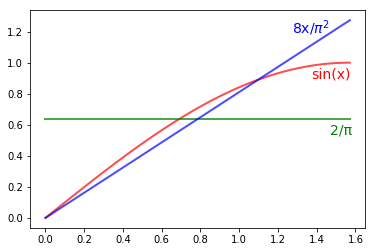

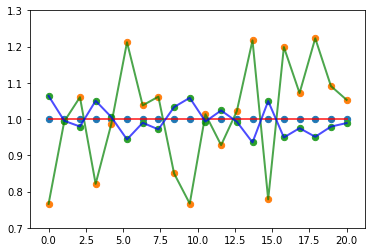

In [112]:
min_x = 0
max_x = np.pi / 2

plot_function_curves(min_x, max_x)
plot_integral_curves(min_x, max_x, 20, 15)
